In [13]:
import pandas as pd
from statsmodels.formula import api as smf
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [29]:
df = pd.read_csv('./Data/Teld_after_process.csv')
df.head()

,index,operation_type_non_self_operated,operation_type_self_operated,is_outdoor_outdoor,is_free_parking_no,is_free_parking_yes,refundable_1,discount_1,floor,elec_fee,serv_fee,dc_number,ac_number,rating
0,0,1,0,1,0,0,0,1,0.5,0.375706,0.384615,0.137363,0.0,0.875
1,1,0,1,1,0,0,1,1,0.5,0.387205,0.369551,0.065934,0.0,0.875
2,2,0,0,0,1,0,0,0,0.5,0.354167,0.384615,0.098901,0.0,1.000
3,3,1,0,1,0,0,1,1,0.5,0.376551,0.384615,0.098901,0.0,0.875
4,4,0,1,1,0,0,1,1,0.5,0.415557,0.370833,0.065934,0.0,0.825


In [30]:
# 去掉所有的dc为0的试试结果
df_9163 = df.drop(df[df['dc_number'] == 0].index)
df_9163.describe()  # 9163个数据

,index,operation_type_non_self_operated,operation_type_self_operated,is_outdoor_outdoor,is_free_parking_no,is_free_parking_yes,refundable_1,discount_1,floor,elec_fee,serv_fee,dc_number,ac_number,rating
count,9163.000000,9163.000000,9163.000000,9163.000000,9163.00000,9163.000000,9163.000000,9163.000000,9163.000000,9163.000000,9163.000000,9163.000000,9163.000000,9163.000000
mean,5031.365164,0.245662,0.686675,0.757503,0.23082,0.343665,0.713740,0.701517,0.463451,0.215408,0.191696,0.069425,0.011036,0.737452
std,2902.247419,0.430502,0.463871,0.428617,0.42138,0.474957,0.452037,0.457617,0.094541,0.183937,0.186897,0.072157,0.028761,0.212982
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.005495,0.000000,0.000000
25%,2544.500000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.021978,0.000000,0.650000
50%,5021.000000,0.000000,1.000000,1.000000,0.00000,0.000000,1.000000,1.000000,0.500000,0.307147,0.198122,0.054945,0.000000,0.800000
75%,7578.500000,0.000000,1.000000,1.000000,0.00000,1.000000,1.000000,1.000000,0.500000,0.365188,0.346154,0.098901,0.009479,0.875000
max,10037.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,0.923077,1.000000,0.616114,1.000000


In [31]:
formula1 = 'rating ~ operation_type_self_operated+is_free_parking_no+is_free_parking_yes+refundable_1+is_outdoor_outdoor+elec_fee+dc_number+ac_number'
model1 = smf.ols(formula = formula1, data = df_9163).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 rating   R-squared:                       0.185
Model:                            OLS   Adj. R-squared:                  0.185
Method:                 Least Squares   F-statistic:                     260.3
Date:                Tue, 11 Jan 2022   Prob (F-statistic):               0.00
Time:                        23:06:15   Log-Likelihood:                 2108.9
No. Observations:                9163   AIC:                            -4200.
Df Residuals:                    9154   BIC:                            -4136.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                        0.6855      0.008     90.957      0.000       0.671       0.700
operation_type_self_operated    -0.0059      0.005     -1.227      0.220      -0.015       0.004
is_free_parking_no              -0.1443      0.006    -24.889      0.000      -0.156      -0.133
is_free_parking_yes             -0.0208      0.005     -4.203      0.000      -0.030      -0.011
refundable_1                     0.0460      0.005      9.648      0.000       0.037       0.055
is_outdoor_outdoor               0.0189      0.005      3.682      0.000       0.009       0.029
elec_fee                         0.1099      0.012      9.325      0.000       0.087       0.133
dc_number                        0.4404      0.030     14.492      0.000       0.381       0.500
ac_number                       -0.4511      0.072     -6.227      0.000      -0.593      -0.309
==============================================================================
Omnibus:                     1994.510   Durbin-Watson:                   1.910
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4806.904
Skew:                          -1.209   Prob(JB):                         0.00
Kurtosis:                       5.597   Cond. No.                         61.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
# 给dc_number取对数，发现dc_number在那些直流桩不为0的场站中其取对数和rating更相关
formula2 = 'rating ~ operation_type_self_operated+is_free_parking_no+is_free_parking_yes+refundable_1+is_outdoor_outdoor+elec_fee+np.log(dc_number)+ac_number'
model2 = smf.ols(formula = formula2, data = df_9163).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 rating   R-squared:                       0.207
Model:                            OLS   Adj. R-squared:                  0.206
Method:                 Least Squares   F-statistic:                     298.8
Date:                Tue, 11 Jan 2022   Prob (F-statistic):               0.00
Time:                        23:06:19   Log-Likelihood:                 2232.8
No. Observations:                9163   AIC:                            -4448.
Df Residuals:                    9154   BIC:                            -4384.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                        0.8706      0.010     89.544      0.000       0.852       0.890
operation_type_self_operated     0.0001      0.005      0.031      0.975      -0.009       0.009
is_free_parking_no              -0.1197      0.006    -20.214      0.000      -0.131      -0.108
is_free_parking_yes             -0.0004      0.005     -0.078      0.938      -0.010       0.009
refundable_1                     0.0436      0.005      9.270      0.000       0.034       0.053
is_outdoor_outdoor               0.0207      0.005      4.087      0.000       0.011       0.031
elec_fee                         0.0564      0.012      4.665      0.000       0.033       0.080
np.log(dc_number)                0.0512      0.002     21.606      0.000       0.047       0.056
ac_number                       -0.4238      0.071     -5.928      0.000      -0.564      -0.284
==============================================================================
Omnibus:                     1966.483   Durbin-Watson:                   1.906
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4815.206
Skew:                          -1.186   Prob(JB):                         0.00
Kurtosis:                       5.643   Cond. No.                         132.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

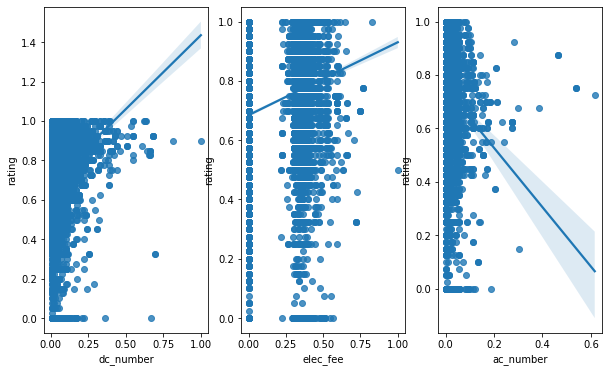

In [43]:
# 为什么r2会增加，因为图像
fig = plt.figure(figsize = (10,6))
plot1 = fig.add_subplot(131)
plot1 = sns.regplot(x = df_9163['dc_number'], y = df_9163['rating'], data = df_9163)
plot2 = fig.add_subplot(132)
plot2 = sns.regplot(x = df_9163['elec_fee'], y = df_9163['rating'], data = df_9163)
plot3 = fig.add_subplot(133)
plot3 = sns.regplot(x = df_9163['ac_number'], y = df_9163['rating'], data = df_9163)
plt.show()

In [41]:
# 换elec_fee取对数
df_elec = df.drop(df[df['elec_fee'] == 0].index)
formula3 = 'rating ~ operation_type_self_operated+is_free_parking_no+is_free_parking_yes+refundable_1+is_outdoor_outdoor+elec_fee+dc_number+ac_number'

model3 = smf.ols(formula = formula3, data = df_elec).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 rating   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.151
Method:                 Least Squares   F-statistic:                     126.5
Date:                Tue, 11 Jan 2022   Prob (F-statistic):          9.84e-196
Time:                        23:15:03   Log-Likelihood:                 1763.0
No. Observations:                5664   AIC:                            -3508.
Df Residuals:                    5655   BIC:                            -3448.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                        0.7677      0.017     46.034      0.000       0.735       0.800
operation_type_self_operated    -0.0122      0.005     -2.266      0.023      -0.023      -0.002
is_free_parking_no              -0.1533      0.008    -19.732      0.000      -0.168      -0.138
is_free_parking_yes             -0.0228      0.006     -4.107      0.000      -0.034      -0.012
refundable_1                     0.0449      0.006      8.057      0.000       0.034       0.056
is_outdoor_outdoor               0.0156      0.007      2.405      0.016       0.003       0.028
elec_fee                        -0.0749      0.041     -1.846      0.065      -0.155       0.005
dc_number                        0.3421      0.031     10.899      0.000       0.281       0.404
ac_number                       -0.0881      0.070     -1.263      0.207      -0.225       0.049
==============================================================================
Omnibus:                     1592.160   Durbin-Watson:                   1.898
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5047.036
Skew:                          -1.428   Prob(JB):                         0.00
Kurtosis:                       6.637   Cond. No.                         50.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
formula4 = 'rating ~ operation_type_self_operated+is_free_parking_no+is_free_parking_yes+refundable_1+is_outdoor_outdoor+np.log(elec_fee)+dc_number+ac_number'
model4 = smf.ols(formula = formula4, data = df_elec).fit()
model4.summary()

# 给电费取对数和取平方的效果都不佳

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 rating   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.151
Method:                 Least Squares   F-statistic:                     126.5
Date:                Tue, 11 Jan 2022   Prob (F-statistic):          1.01e-195
Time:                        23:17:20   Log-Likelihood:                 1763.0
No. Observations:                5664   AIC:                            -3508.
Df Residuals:                    5655   BIC:                            -3448.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                        0.7097      0.019     37.233      0.000       0.672       0.747
operation_type_self_operated    -0.0122      0.005     -2.269      0.023      -0.023      -0.002
is_free_parking_no              -0.1534      0.008    -19.785      0.000      -0.169      -0.138
is_free_parking_yes             -0.0229      0.006     -4.127      0.000      -0.034      -0.012
refundable_1                     0.0450      0.006      8.057      0.000       0.034       0.056
is_outdoor_outdoor               0.0157      0.006      2.417      0.016       0.003       0.028
np.log(elec_fee)                -0.0300      0.016     -1.830      0.067      -0.062       0.002
dc_number                        0.3422      0.031     10.905      0.000       0.281       0.404
ac_number                       -0.0873      0.070     -1.251      0.211      -0.224       0.050
==============================================================================
Omnibus:                     1590.753   Durbin-Watson:                   1.898
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5039.709
Skew:                          -1.427   Prob(JB):                         0.00
Kurtosis:                       6.635   Cond. No.                         58.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:
# ac_number的对数和三次方试一下
df_test = df.drop(df[df['ac_number'] == 0].index)

formula5 = 'rating ~ operation_type_self_operated+is_free_parking_no+is_free_parking_yes+refundable_1+is_outdoor_outdoor+elec_fee+dc_number+I(ac_number**(-3))'
model5 = smf.ols(formula = formula5, data = df_test).fit()
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 rating   R-squared:                       0.123
Model:                            OLS   Adj. R-squared:                  0.121
Method:                 Least Squares   F-statistic:                     67.07
Date:                Tue, 11 Jan 2022   Prob (F-statistic):          1.99e-103
Time:                        23:25:31   Log-Likelihood:                 223.30
No. Observations:                3839   AIC:                            -428.6
Df Residuals:                    3830   BIC:                            -372.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                        0.5798      0.013     43.141      0.000       0.553       0.606
operation_type_self_operated     0.0032      0.009      0.350      0.726      -0.015       0.021
is_free_parking_no              -0.0718      0.011     -6.794      0.000      -0.092      -0.051
is_free_parking_yes              0.0150      0.011      1.424      0.155      -0.006       0.036
refundable_1                     0.0431      0.008      5.228      0.000       0.027       0.059
is_outdoor_outdoor               0.0308      0.009      3.443      0.001       0.013       0.048
elec_fee                         0.1613      0.021      7.681      0.000       0.120       0.202
dc_number                        0.7243      0.096      7.507      0.000       0.535       0.913
I(ac_number ** (-3))         -3.542e-09   1.54e-09     -2.307      0.021   -6.55e-09   -5.32e-10
==============================================================================
Omnibus:                      347.062   Durbin-Watson:                   1.924
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              460.984
Skew:                          -0.759   Prob(JB):                    7.92e-101
Kurtosis:                       3.758   Cond. No.                     6.79e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.79e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [49]:
formula6 = 'rating ~ operation_type_self_operated+is_free_parking_no+is_free_parking_yes+refundable_1+is_outdoor_outdoor+elec_fee+dc_number+np.log(ac_number)'
model6 = smf.ols(formula = formula6, data = df_test).fit()
model6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 rating   R-squared:                       0.122
Model:                            OLS   Adj. R-squared:                  0.120
Method:                 Least Squares   F-statistic:                     66.54
Date:                Tue, 11 Jan 2022   Prob (F-statistic):          1.25e-102
Time:                        23:26:15   Log-Likelihood:                 221.44
No. Observations:                3839   AIC:                            -424.9
Df Residuals:                    3830   BIC:                            -368.6
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                        0.5963      0.020     29.583      0.000       0.557       0.636
operation_type_self_operated     0.0028      0.009      0.310      0.757      -0.015       0.021
is_free_parking_no              -0.0725      0.011     -6.849      0.000      -0.093      -0.052
is_free_parking_yes              0.0145      0.011      1.377      0.169      -0.006       0.035
refundable_1                     0.0433      0.008      5.239      0.000       0.027       0.060
is_outdoor_outdoor               0.0320      0.009      3.540      0.000       0.014       0.050
elec_fee                         0.1616      0.021      7.692      0.000       0.120       0.203
dc_number                        0.7178      0.098      7.357      0.000       0.527       0.909
np.log(ac_number)                0.0054      0.004      1.264      0.206      -0.003       0.014
==============================================================================
Omnibus:                      350.790   Durbin-Watson:                   1.926
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              467.688
Skew:                          -0.764   Prob(JB):                    2.77e-102
Kurtosis:                       3.769   Cond. No.                         110.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""